# Project: Sales Forecasting with Linear Regression
**Author: Navneet Raj**

This notebook builds a regression model to predict future sales using historical data.

In [5]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# Step 2: Load and explore the data
# Upload your file in the left panel or use a path like '/content/sample_sales_data(4).csv'
df = pd.read_csv('/content/sample_sales_data(4).csv')
print(df.head())
print(df.info())

         date    product  quantity     revenue
0  2024-02-21  Product C        19  465.942545
1  2024-04-02  Product B        17  609.223724
2  2024-01-15  Product A         4  131.324529
3  2024-03-12  Product C        12  290.926428
4  2024-03-01  Product A         9  445.145490
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      300 non-null    object 
 1   product   300 non-null    object 
 2   quantity  300 non-null    int64  
 3   revenue   300 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ KB
None


In [10]:
# Step 3: Preprocess the data
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df['sales'] = df['quantity'] * df['revenue']

In [11]:
# Step 4: Aggregate and engineer features
df = df.groupby('date').agg({'sales': 'sum'}).reset_index()
df['days'] = (df['date'] - df['date'].min()).dt.days

In [12]:
# Step 5: Train-test split and model training
X = df[['days']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58985527.66530921


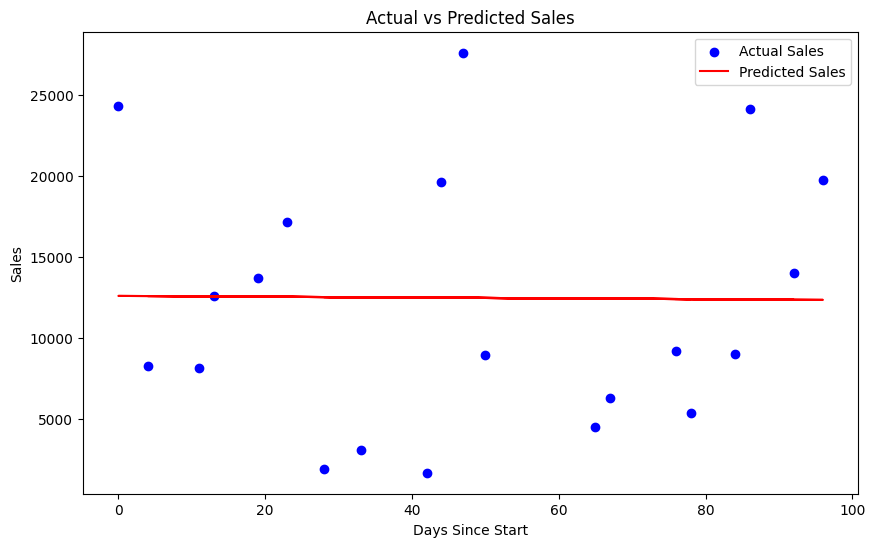

In [14]:
# Step 7: Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('Days Since Start')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [15]:
# Step 8: Forecast future sales
future_days = pd.DataFrame({'days': np.arange(df['days'].max() + 1, df['days'].max() + 31)})
future_sales = model.predict(future_days)

forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30),
    'Predicted_Sales': future_sales
})
forecast_df.head()

,Date,Predicted_Sales
0,2024-04-10,12341.944358
1,2024-04-11,12339.398483
2,2024-04-12,12336.852608
3,2024-04-13,12334.306733
4,2024-04-14,12331.760858


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted_Sales'].plot(kind='hist', bins=20, title='Predicted_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Predicted_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predicted_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predicted_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Predicted_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Predicted_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Predicted_Sales'].plot(kind='line', figsize=(8, 4), title='Predicted_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

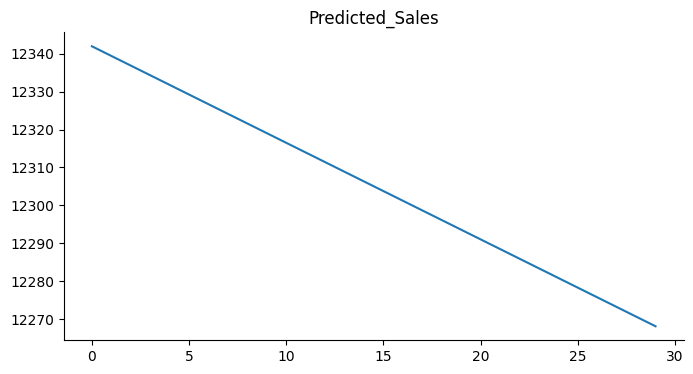

In [17]:
# @title Predicted_Sales

from matplotlib import pyplot as plt
forecast_df['Predicted_Sales'].plot(kind='line', figsize=(8, 4), title='Predicted_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=forecast_df)

MessageError: Error: credential propagation was unsuccessful